In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pi = 3.1415926535897932384626433832795

x_bounds = {}
x_bounds["left"] = -5
x_bounds["right"] = 5

y_bounds = {}
y_bounds["left"] = -5
y_bounds["right"] = 5

z_bounds = {}
z_bounds["left"] = -1
z_bounds["right"] = 1

def f(x, y):
    return np.sin(2*x/pi) * np.sin(2*y/pi)

In [3]:
x = np.linspace(x_bounds["left"], x_bounds["right"], 30)
y = np.linspace(y_bounds["left"], y_bounds["right"], 30)

X, Y = np.meshgrid(x, y)

def to_bound(low, high):
    def f(v):
        if v < low:
            return low
        if v > high:
            return high
        return v
    return f

def make_z(x, y, f, lb, rb):
    z = f(x, y)
    for i, zz in enumerate(z):
        zz = list(map(to_bound(lb, rb), zz))
        z[i] = zz
    return z

Z = make_z(X, Y, f, z_bounds["left"], z_bounds["right"])

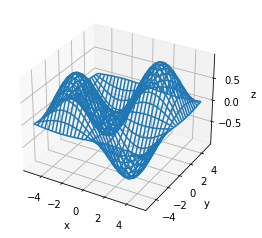

In [4]:
def plot_3d_surface(x, y, z):  
    #%matplotlib widget
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_wireframe(x, y, z)

plot_3d_surface(X, Y, Z)

In [5]:
n_intervals = 3

def dots(v, n):
    s = np.sort(v.flatten())
    step = 100 / n
    res = []
    for i in np.arange (0, 100, step):
        p = np.percentile(s, i)
        res.append(p)
    res.append(np.percentile(s, 100))
    return res

xdots = dots(X, n_intervals)

def intervals(dots):
    res = []
    for i in range(0, len(dots)-1, 1):
        r = [dots[i], dots[i+1]]
        res.append(r)
    return res

xintervals = intervals(xdots)

def triangles(intervals):
    res = []
    for i in range(0, len(intervals), 1):
        if i == 0:
            r = [intervals[i][0], 0], [intervals[i][0], 1], [intervals[i][1], 0]
            res.append(r)
            continue
        if i == len(intervals) - 1:
            r = [intervals[i][0], 0], [intervals[i][1], 1], [intervals[i][1], 0]
            res.append(r)
            continue
        l = (intervals[i][1] - intervals[i][0])/2
        r = [intervals[i][0]-l, 0], [intervals[i][0]+l, 1], [intervals[i][1]+l, 0]
        res.append(r)
    return res

xtriangles = triangles(xintervals)

def functions(triangles):
    def create_f(x0, y0, x1, y1):
        def f(x):
            return (x - x0) / (x1 - x0) * (y1 - y0) + y0
        return f
    res = []
    for i, tr in enumerate(triangles):
        v = []
        if i != 0:
            x0, y0 = tr[0][0], tr[0][1]
            x1, y1 = tr[1][0], tr[1][1]
            l1 = create_f(x0, y0, x1, y1)
            v.append(l1)
        if i != len(triangles) - 1:
            x0, y0 = tr[1][0], tr[1][1]
            x1, y1 = tr[2][0], tr[2][1]
            l2 = create_f(x0, y0, x1, y1)
            v.append(l2)
        res.append(v)
    return res

xfunctions = functions(xtriangles)

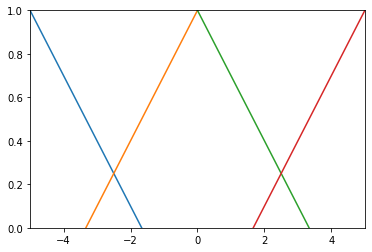

In [6]:
fig = plt.figure()
for f in xfunctions:
    for q in f:
        x = np.linspace(-5,5,100)
        y = q(x)
        plt.plot(x, y)
plt.ylim(0, 1)
plt.xlim(-5, 5)
plt.show()

In [7]:
for i in range(-5, 5):
    m = 0
    p = 0
    for n, f in enumerate(xfunctions):
        for q in f:
            v = q(i)
            if v >= 0 and v <= 1 and v > m:
                m = v
                p = n
    print(i, "in", p)

-5 in 0
-4 in 0
-3 in 0
-2 in 1
-1 in 1
0 in 1
1 in 1
2 in 1
3 in 2
4 in 2
